## Steps to Do:

1. review types of variable stars, the history, and interesting effects (First Star found, RRLyrae, Cephids, blazhko.
2. mess with eq.(14.7) and eq.(14.8) in Carrol & Ostile 2nd. ed to make a mathematical model.
3. Find a variable star with known data and period to compare to my model.
4. combine all into a 30ish min presentation.

## For the DiffEq:

1. read through computational book to find information about 2nd order DiffEq. Use Runga-Cutta
2. Code the linear case with the simple model in Ex. 14.3.1.
3. Try the nonlinear case.
4. compare to chosen variable star.

## Equation 14.7:

$\rho \frac{d^2 r}{dt^2} = -G\frac{M_r \rho}{r^2} - \frac{dP}{dr}$

## Equation 14.8:

$m \frac{d^2 R}{dt^2} = -G\frac{M m}{R^2} - 4\pi R^2 P$

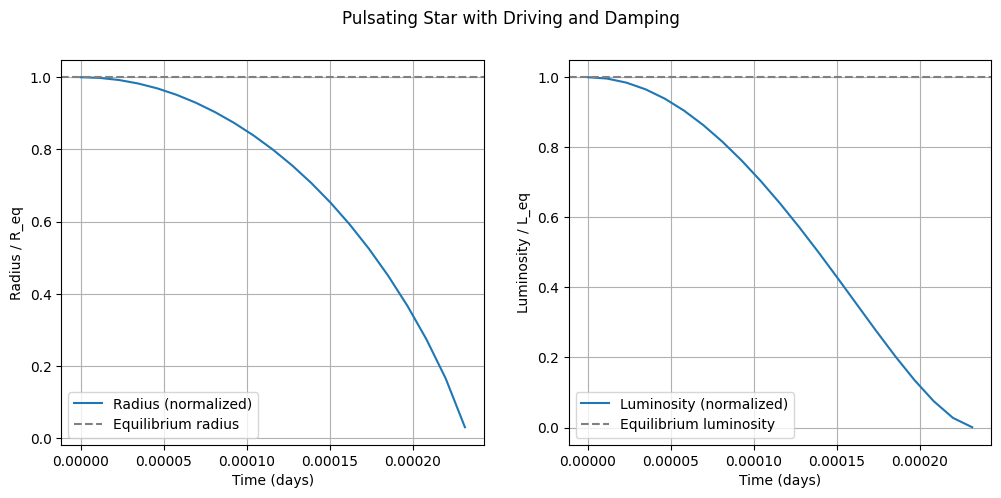

In [39]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11   # Gravitational constant (m^3 kg^-1 s^-2)
M_r = 1.989e30    # Mass enclosed (kg) - roughly the Sun's mass
rho = 1.4e3       # Density (kg/m^3)
K = 1e13          # Polytropic constant
n = 1.5           # Polytropic index
gamma = 1e-6      # Damping coefficient (s^-1)
A = 1e2           # Driving amplitude (m/s^2)
omega_drive = 2 * np.pi / (5 * 24 * 3600)  # Driving frequency (5-day period)

# Define pressure gradient (simplified)
def dPdr(r):
    if r <= 0:
        return 0
    return -(1 + 1/n) * K * rho**(1/n) * rho / r

# System of ODEs with driving
def equations(t, y):
    r, v = y
    if r <= 0:
        return [0, 0]  # Prevent collapse
    drdt = v
    dvdt = -G * M_r / r**2 + dPdr(r) / rho - gamma * v + A * np.sin(omega_drive * t)
    return [drdt, dvdt]

# Initial conditions
r0 = 7e8 * 1.05   # Initial radius (slightly larger than equilibrium)
v0 = 0            # Start at rest

# Time span and evaluation points
t_span = (0, 2e7)  # 2e7 seconds ≈ 231 days
t_eval = np.linspace(*t_span, 20000000)

# Solve the system
sol = solve_ivp(equations, t_span, [r0, v0], t_eval=t_eval, method='RK45')

# Compute luminosity variation (simplified as L ∝ R^2)
luminosity = (sol.y[0] / r0)**2

# Plot radius oscillation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t / (24 * 3600), sol.y[0] / r0, label='Radius (normalized)')
plt.axhline(1, color='gray', linestyle='--', label='Equilibrium radius')
plt.xlabel('Time (days)')
plt.ylabel('Radius / R_eq')
plt.legend()
plt.grid()

# Plot luminosity variation
plt.subplot(1, 2, 2)
plt.plot(sol.t / (24 * 3600), luminosity, label='Luminosity (normalized)')
plt.axhline(1, color='gray', linestyle='--', label='Equilibrium luminosity')
plt.xlabel('Time (days)')
plt.ylabel('Luminosity / L_eq')
plt.legend()
plt.grid()

plt.suptitle('Pulsating Star with Driving and Damping')
plt.show()


In [40]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11   # Gravitational constant (m^3 kg^-1 s^-2)
M_r = 1.989e30    # Mass enclosed (kg) - roughly the Sun's mass
rho = 1.4e3       # Density (kg/m^3)
K = 1e13          # Polytropic constant
n = 1.5           # Polytropic index
gamma = 1e-6      # Damping coefficient (s^-1)
A = 1e4           # Driving amplitude (m/s^2)

# Equilibrium radius (Sun-like)
R_eq = 7e8

# Compute natural frequency
omega_0 = np.sqrt(G * M_r / R_eq**3)
T_natural = 2 * np.pi / omega_0 / (24 * 3600)  # Convert to days
print(f"Natural period ≈ {T_natural:.2f} days")

# Set the driving frequency close to the natural frequency
omega_drive = omega_0 * 0.95

# Define pressure gradient (simplified)
def dPdr(r):
    if r <= 0:
        return 0
    return -(1 + 1/n) * K * rho**(1/n) * rho / r

# System of ODEs with driving
def equations(t, y):
    r, v = y
    if r <= 0:
        return [0, 0]  # Prevent collapse
    drdt = v
    dvdt = -G * M_r / r**2 + dPdr(r) / rho - gamma * v + A * np.sin(omega_drive * t)
    return [drdt, dvdt]

# Initial conditions
r0 = R_eq * 1.05   # Start slightly above equilibrium
v0 = 0             # Start


Natural period ≈ 0.12 days


Natural period ≈ 0.12 days


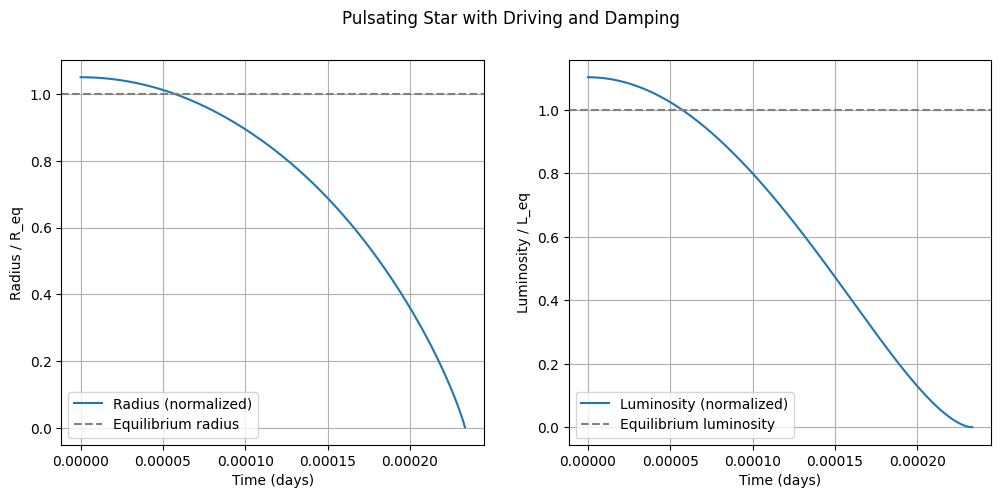

In [43]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11   # Gravitational constant (m^3 kg^-1 s^-2)
M_r = 1.989e30    # Mass enclosed (kg) - roughly the Sun's mass
rho = 1.4e3       # Density (kg/m^3)
K = 1e13          # Polytropic constant
n = 1.5           # Polytropic index
gamma = 1e-6      # Damping coefficient (s^-1)
A = 1e4           # Driving amplitude (m/s^2)

# Equilibrium radius (Sun-like)
R_eq = 7e8

# Compute natural frequency
omega_0 = np.sqrt(G * M_r / R_eq**3)
T_natural = 2 * np.pi / omega_0 / (24 * 3600)  # Convert to days
print(f"Natural period ≈ {T_natural:.2f} days")

# Set the driving frequency close to the natural frequency
omega_drive = omega_0 * 0.95

# Define pressure gradient (simplified)
def dPdr(r):
    if r <= 0:
        return 0
    return -(1 + 1/n) * K * rho**(1/n) * rho / r

# System of ODEs with driving
def equations(t, y):
    r, v = y
    if r <= 0:
        return [0, 0]  # Prevent collapse
    drdt = v
    dvdt = -G * M_r / r**2 + dPdr(r) / rho - gamma * v + A * np.sin(omega_drive * t)
    return [drdt, dvdt]

# Initial conditions
r0 = R_eq * 1.05   # Start slightly above equilibrium
v0 = 0             # Start at rest

# Time span and evaluation points
t_span = (0, 2e7)  # 2e7 seconds ≈ 231 days
t_eval = np.linspace(*t_span, 2000000000)

# Solve the system
sol = solve_ivp(equations, t_span, [r0, v0], t_eval=t_eval, method='RK45')

# Compute luminosity variation (simplified as L ∝ R^2)
luminosity = (sol.y[0] / R_eq)**2

# Plot radius oscillation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t / (24 * 3600), sol.y[0] / R_eq, label='Radius (normalized)')
plt.axhline(1, color='gray', linestyle='--', label='Equilibrium radius')
plt.xlabel('Time (days)')
plt.ylabel('Radius / R_eq')
plt.legend()
plt.grid()

# Plot luminosity variation
plt.subplot(1, 2, 2)
plt.plot(sol.t / (24 * 3600), luminosity, label='Luminosity (normalized)')
plt.axhline(1, color='gray', linestyle='--', label='Equilibrium luminosity')
plt.xlabel('Time (days)')
plt.ylabel('Luminosity / L_eq')
plt.legend()
plt.grid()

plt.suptitle('Pulsating Star with Driving and Damping')
plt.show()


/var/folders/1k/rdwyb7sd6hq23xhhtb7j4y100000gq/T/ipykernel_32013/1975328591.py:21: RuntimeWarning: invalid value encountered in scalar power
  return (gamma - 1) * K * r**(gamma - 2)


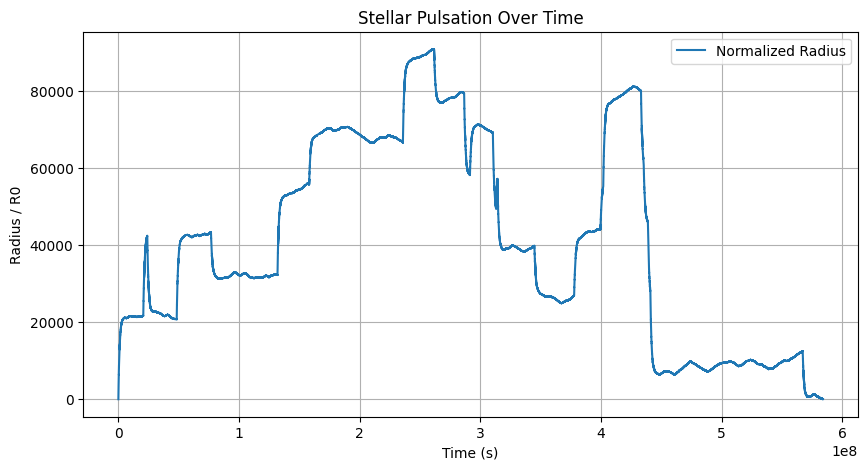

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M = 2.0e30  # Mass of the star (kg)
R0 = 7.0e8  # Initial radius (m)
K = 1  # Pressure constant (simplified polytropic model)
rho = 1.0e3  # Density (kg/m^3)
gamma = 4/3  # Adiabatic index for a polytrope

# Driving force parameters
F_drive_amp = 1.0e5  # Amplitude of driving force
F_drive_freq = 1.0e-3  # Driving frequency (Hz)

def pressure(r):
    return K * r**(gamma - 1)

def dpressure_dr(r):
    return (gamma - 1) * K * r**(gamma - 2)

def stellar_pulsation(t, y):
    r, v = y  # y = [radius, velocity]
    
    # Gravitational force
    F_grav = -G * M / r**2
    
    # Pressure gradient force
    F_pres = -dpressure_dr(r) / rho
    
    # Driving force
    F_drive = F_drive_amp * np.sin(2 * np.pi * F_drive_freq * t)
    
    # Acceleration
    damping_factor = 1e-6
    a = F_grav + F_pres + F_drive - damping_factor*v
    
    return [v, a]

# Initial conditions
r_init = R0 * 1.1  # Slightly perturbed from equilibrium
v_init = 0  # Initially at rest

time_span = (0, 1e10)  # Simulation time in seconds
time_eval = np.linspace(time_span[0], time_span[1], 100000000)

# Solve ODE
solution = solve_ivp(stellar_pulsation, time_span, [r_init, v_init], t_eval=time_eval, method='RK45')

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(solution.t, solution.y[0] / R0, label='Normalized Radius')
plt.xlabel('Time (s)')
# plt.xlim(-1,20000)
plt.ylabel('Radius / R0')
plt.title('Stellar Pulsation Over Time')
plt.legend()
plt.grid()
plt.show()

TypeError: cannot unpack non-iterable float object